In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ifsp-d3apl-2023-face-recognition/sample_submission.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/train.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0664.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1269.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0733.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0106.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0375.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1075.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0285.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0591.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0799.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1411.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0074.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1031.jpg
/kaggle/input/ifsp-d3apl-2

# **1. Dataset**

# 1.1 Profiling

In [2]:
ls ../input/ifsp-d3apl-2023-face-recognition/train/train/

'Adam Sandler'/       'Faith Hill'/            'Meg Ryan'/
'Alec Baldwin'/       'George Clooney'/        'Meryl Streep'/
'Angelina Jolie'/     'Gordon Brown'/          'Michael Bloomberg'/
'Anna Kournikova'/    'Gwyneth Paltrow'/       'Mickey Rourke'/
'Ashton Kutcher'/     'Halle Berry'/           'Miley Cyrus'/
'Avril Lavigne'/      'Harrison Ford'/         'Morgan Freeman'/
'Barack Obama'/       'Hugh Jackman'/          'Nicole Kidman'/
'Ben Affleck'/        'Hugh Laurie'/           'Nicole Richie'/
'Beyonce Knowles'/    'Jack Nicholson'/        'Orlando Bloom'/
'Brad Pitt'/          'Jennifer Aniston'/      'Reese Witherspoon'/
'Cameron Diaz'/       'Jennifer Lopez'/        'Renee Zellweger'/
'Cate Blanchett'/     'Jennifer Love Hewitt'/  'Ricky Martin'/
'Charlize Theron'/    'Jessica Alba'/          'Robert Gates'/
'Christina Ricci'/    'Jessica Simpson'/       'Sania Mirza'/
'Claudia Schiffer'/   'Joaquin Phoenix'/       'Scarlett Johansson'/
'Clive Owen'/         'John Travolta

In [3]:
import os

dataset_folder = '../input/ifsp-d3apl-2023-face-recognition/train/train/'

class_folders = sorted(os.listdir(dataset_folder))


print(class_folders)
print(f'Number of class: {len(class_folders)}')

['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon', 'Meg Ryan', 'Meryl Streep', '

In [4]:
# show me the class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')

Number of Images for Class "Adam Sandler": 88
Number of Images for Class "Alec Baldwin": 83
Number of Images for Class "Angelina Jolie": 194
Number of Images for Class "Anna Kournikova": 151
Number of Images for Class "Ashton Kutcher": 81
Number of Images for Class "Avril Lavigne": 279
Number of Images for Class "Barack Obama": 249
Number of Images for Class "Ben Affleck": 97
Number of Images for Class "Beyonce Knowles": 106
Number of Images for Class "Brad Pitt": 280
Number of Images for Class "Cameron Diaz": 226
Number of Images for Class "Cate Blanchett": 140
Number of Images for Class "Charlize Theron": 175
Number of Images for Class "Christina Ricci": 123
Number of Images for Class "Claudia Schiffer": 102
Number of Images for Class "Clive Owen": 114
Number of Images for Class "Colin Farrell": 125
Number of Images for Class "Colin Powell": 92
Number of Images for Class "Cristiano Ronaldo": 148
Number of Images for Class "Daniel Craig": 148
Number of Images for Class "Daniel Radclif

In [5]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

# Print the sorted file counts
#for class_folder, count in sorted_counts:
#    print(f"{class_folder}: {count} files")


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

# 1.2 Duplicate the training data folder for oversampling

In [6]:
import shutil
# Set the paths for the input and output directories
input_dir = dataset_folder
data_dir = '../working/oversampled'

# Duplicate the entire folder
shutil.copytree(input_dir, data_dir)


'../working/oversampled'

In [7]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

In [8]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image 
import PIL 

# Set the desired number of samples per class
desired_samples = 3000

# Create an instance of the ImageDataGenerator
data_generator = ImageDataGenerator(
    #rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.1,  # Randomly shift the width of images by 10%
    #height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,  # Apply random zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)

# Iterate through the folders representing each class
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        # Get the list of images in the current class folder
        images = os.listdir(class_folder_path)
        
        # Calculate the number of existing samples in the class
        existing_samples = len(images)
        
        if existing_samples < desired_samples:
            # Calculate the number of additional samples needed
            additional_samples = desired_samples - existing_samples
            
            # Randomly select images from the existing samples
            #selected_images = random.sample(images, additional_samples)
            
            # Create a data generator for the current class folder
            generator = data_generator.flow_from_directory(
                directory=data_dir,
                target_size=(100, 100),  # Adjust the target size as per your requirements
                batch_size=1,
                class_mode='categorical',
                classes=[class_folder],
                shuffle=True,
                save_to_dir=class_folder_path, 
                save_prefix='aug-',
                save_format='jpg'
            )
            
            # Generate additional samples using the data generator
            for i in range(additional_samples):
                batch = next(generator)
                imagem = batch[0]
                


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 81 images belonging to 1 classes.
Found 179 images belonging to 1 classes.
Found 108 images belonging to 1 classes.
Found 81 images belonging to 1 classes.
Found 226 images belonging to 1 classes.
Found 82 images belonging to 1 classes.
Found 147 images belonging to 1 classes.
Found 177 images belonging to 1 classes.
Found 110 images belonging to 1 classes.
Found 106 images belonging to 1 classes.
Found 173 images belonging to 1 classes.
Found 108 images belonging to 1 classes.
Found 130 images belonging to 1 classes.
Found 280 images belonging to 1 classes.
Found 226 images belonging to 1 classes.
Found 97 images belonging to 1 classes.
Found 137 images belonging to 1 classes.
Found 87 images belonging to 1 classes.
Found 113 images belonging to 1 classes.
Found 92 images belonging to 1 classes.
Found 146 images belonging to 1 classes.
Found 279 images belonging to 1 classes.
Found 140 images belonging to 1 classes.
Found 123 images belonging to 1 classes.
Found 190 images belon

In [9]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

[('Adam Sandler', 400), ('Alec Baldwin', 400), ('Angelina Jolie', 400), ('Anna Kournikova', 400), ('Ashton Kutcher', 400), ('Avril Lavigne', 400), ('Barack Obama', 400), ('Ben Affleck', 400), ('Beyonce Knowles', 400), ('Brad Pitt', 400), ('Cameron Diaz', 400), ('Cate Blanchett', 400), ('Charlize Theron', 400), ('Christina Ricci', 400), ('Claudia Schiffer', 400), ('Clive Owen', 400), ('Colin Farrell', 400), ('Colin Powell', 400), ('Cristiano Ronaldo', 400), ('Daniel Craig', 400), ('Daniel Radcliffe', 400), ('David Beckham', 400), ('David Duchovny', 400), ('Denise Richards', 400), ('Drew Barrymore', 400), ('Dustin Hoffman', 400), ('Ehud Olmert', 400), ('Eva Mendes', 400), ('Faith Hill', 400), ('George Clooney', 400), ('Gordon Brown', 400), ('Gwyneth Paltrow', 400), ('Halle Berry', 400), ('Harrison Ford', 400), ('Hugh Jackman', 400), ('Hugh Laurie', 400), ('Jack Nicholson', 400), ('Jennifer Aniston', 400), ('Jennifer Lopez', 400), ('Jennifer Love Hewitt', 400), ('Jessica Alba', 400), ('Je

In [10]:
#import shutil
#shutil.make_archive(data_dir, 'zip', '../working','oversampled')

# 1.3 Preprocessing the dataset

In [11]:
max_n_samples_per_class = 3000

In [12]:
import random
import os

data_dir = '../working/oversampled'
dataset_folder = data_dir
class_folders = sorted(os.listdir(dataset_folder))

# OPTIONAL: just to get the same selected images
random.seed(42)

img_full_paths = []
img_classes = []

for class_folder in class_folders:
    img_class = class_folder  # english
    print(f'Class: {img_class}')  # italiano
    
    # translated class
    #img_class = translate[class_folder]  # english
    #print(f'Translation: {img_class}')  # italiano
    
    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)
    print(full_class_folder)
    
    # get all image filenames (without their parent dir) for the current class/animal
    class_img_filenames = sorted(os.listdir(full_class_folder))
    print(len(class_img_filenames))
    
    #### undersampling from scratch
    ### one possible strategy to select `max_n_samples_per_class` of samples randomly
    # random.shuffle(class_img_filenames)
    # class_img_filenames = class_img_filenames[:max_n_samples_per_class]

    class_img_filenames = random.sample(class_img_filenames, max_n_samples_per_class)
    print(f'Number of images: {len(class_img_filenames)}')
    
    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)
        
        img_full_paths.append(full_img_path)
        img_classes.append(img_class)
    
    print()

Class: Adam Sandler
../working/oversampled/Adam Sandler
400
Number of images: 400

Class: Alec Baldwin
../working/oversampled/Alec Baldwin
400
Number of images: 400

Class: Angelina Jolie
../working/oversampled/Angelina Jolie
400
Number of images: 400

Class: Anna Kournikova
../working/oversampled/Anna Kournikova
400
Number of images: 400

Class: Ashton Kutcher
../working/oversampled/Ashton Kutcher
400
Number of images: 400

Class: Avril Lavigne
../working/oversampled/Avril Lavigne
400
Number of images: 400

Class: Barack Obama
../working/oversampled/Barack Obama
400
Number of images: 400

Class: Ben Affleck
../working/oversampled/Ben Affleck
400
Number of images: 400

Class: Beyonce Knowles
../working/oversampled/Beyonce Knowles
400
Number of images: 400

Class: Brad Pitt
../working/oversampled/Brad Pitt
400
Number of images: 400

Class: Cameron Diaz
../working/oversampled/Cameron Diaz
400
Number of images: 400

Class: Cate Blanchett
../working/oversampled/Cate Blanchett
400
Number of

In [13]:
print(len(img_full_paths))

33200


In [14]:
print(len(img_classes))

33200


In [15]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({
    'image_pathname': img_full_paths,
    'class': img_classes
})

dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/aug-_70_74...,Adam Sandler
1,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/152.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/aug-_84_35...,Adam Sandler
4,../working/oversampled/Adam Sandler/aug-_22_43...,Adam Sandler
...,...,...
33195,../working/oversampled/Zac Efron/259.jpg,Zac Efron
33196,../working/oversampled/Zac Efron/aug-_145_6946...,Zac Efron
33197,../working/oversampled/Zac Efron/370.jpg,Zac Efron
33198,../working/oversampled/Zac Efron/aug-_138_9665...,Zac Efron


In [16]:
dataset_df['class'].value_counts()

Adam Sandler         400
Nicole Kidman        400
Miley Cyrus          400
Mickey Rourke        400
Michael Bloomberg    400
                    ... 
Ehud Olmert          400
Dustin Hoffman       400
Drew Barrymore       400
Denise Richards      400
Zac Efron            400
Name: class, Length: 83, dtype: int64

# 1.4 Saving the preprocessed dataset

In [17]:
dataset_df.to_csv('../working/faces_dataset_oversampled.csv', index=False)

# 1.5 Inspecting an image

In [18]:
import cv2

In [19]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/aug-_70_7428428.jpg'

In [20]:
# read an image
img = cv2.imread(dataset_df.loc[0, 'image_pathname'])
print(type(img))
img.shape

<class 'numpy.ndarray'>


(100, 100, 3)

In [21]:
# channel BLUE
img[:, :, 0]

array([[153, 161, 147, ...,   0,  10,  30],
       [149, 160, 145, ...,   0,  13,  32],
       [131, 139, 126, ...,   2,  19,  37],
       ...,
       [ 47,  48,  51, ..., 110, 128, 136],
       [ 47,  48,  51, ...,  34,  41,  42],
       [ 47,  49,  51, ...,  47,  47,  43]], dtype=uint8)

In [22]:
# channel GREEN
img[:, :, 1]

array([[153, 161, 147, ...,   3,  17,  37],
       [149, 160, 145, ...,   4,  20,  39],
       [131, 139, 126, ...,   6,  23,  41],
       ...,
       [ 54,  55,  57, ..., 115, 133, 141],
       [ 54,  55,  57, ...,  39,  46,  47],
       [ 54,  56,  57, ...,  52,  52,  48]], dtype=uint8)

In [23]:
# channel RED
img[:, :, 2]

array([[135, 143, 129, ...,   0,  10,  30],
       [131, 142, 127, ...,   0,  13,  32],
       [113, 121, 108, ...,   0,  17,  35],
       ...,
       [ 47,  48,  52, ..., 106, 124, 132],
       [ 47,  48,  52, ...,  30,  37,  38],
       [ 47,  49,  52, ...,  43,  43,  39]], dtype=uint8)

In [24]:
img.min(), img.max()

(0, 255)

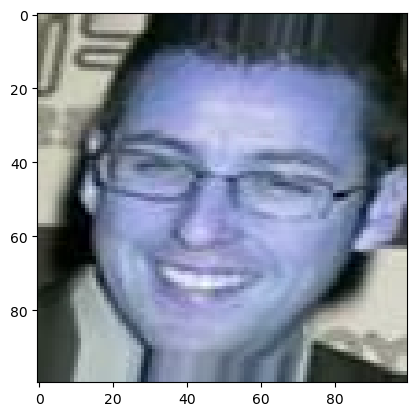

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)

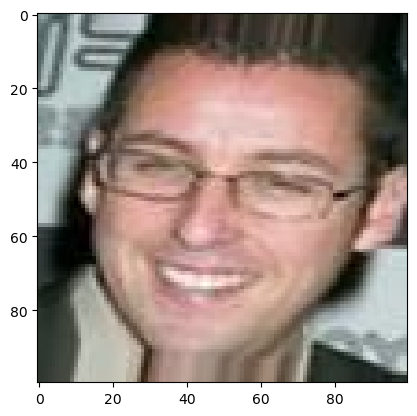

In [26]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_RGB)

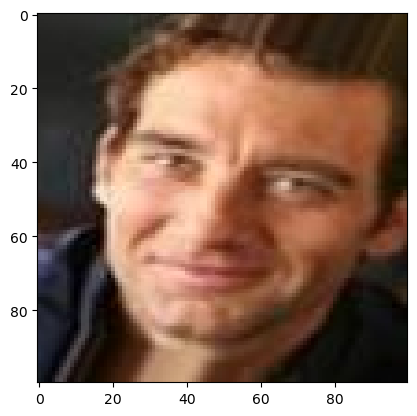

In [27]:
img = cv2.imread(dataset_df.loc[6000, 'image_pathname'])  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img)

In [28]:
img.shape

(100, 100, 3)

# 1.6 Create the training dataset

In [29]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [31]:
dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/aug-_70_74...,Adam Sandler
1,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/152.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/aug-_84_35...,Adam Sandler
4,../working/oversampled/Adam Sandler/aug-_22_43...,Adam Sandler
...,...,...
33195,../working/oversampled/Zac Efron/259.jpg,Zac Efron
33196,../working/oversampled/Zac Efron/aug-_145_6946...,Zac Efron
33197,../working/oversampled/Zac Efron/370.jpg,Zac Efron
33198,../working/oversampled/Zac Efron/aug-_138_9665...,Zac Efron


In [32]:
dataset_df["class"].unique()

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [33]:
class_names = sorted(dataset_df["class"].unique())
n_classes = len(class_names)

print(f'Number of classes: {n_classes}')
print(f'Classes: {class_names}')

Number of classes: 83
Classes: ['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon'

In [34]:
# number of samples per class
dataset_df['class'].value_counts()

Adam Sandler         400
Nicole Kidman        400
Miley Cyrus          400
Mickey Rourke        400
Michael Bloomberg    400
                    ... 
Ehud Olmert          400
Dustin Hoffman       400
Drew Barrymore       400
Denise Richards      400
Zac Efron            400
Name: class, Length: 83, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

# for a stratified sampling, we need to pass the labels
labels = dataset_df['class']

dataset_df_full_train, dataset_df_test = train_test_split(dataset_df, test_size=0.2, random_state=42, stratify=labels)

In [36]:
dataset_df_full_train.shape

(26560, 2)

In [37]:
dataset_df_full_train.head()

,image_pathname,class
15584,../working/oversampled/Jennifer Lopez/aug-_58_...,Jennifer Lopez
7129,../working/oversampled/Colin Powell/aug-_55_44...,Colin Powell
20816,../working/oversampled/Lindsay Lohan/164.jpg,Lindsay Lohan
30885,../working/oversampled/Tom Cruise/243.jpg,Tom Cruise
30477,../working/oversampled/Steve Carell/120.jpg,Steve Carell


In [38]:
dataset_df_test.shape

(6640, 2)

In [39]:
# for a stratified sampling, we need to pass the labels
labels_full_train = dataset_df_full_train['class']
#labels = dataset_df['class']

dataset_df_train, dataset_df_val = train_test_split(dataset_df_full_train, train_size=0.8, random_state=42, stratify=labels_full_train)
#dataset_df_train, dataset_df_val = train_test_split(dataset_df, train_size=0.8, random_state=42, stratify=labels)

dataset_df_train['class'].value_counts()

Meg Ryan             256
Jack Nicholson       256
Matt Damon           256
Sania Mirza          256
Faith Hill           256
                    ... 
Mickey Rourke        256
Leonardo DiCaprio    256
Martha Stewart       256
Charlize Theron      256
Julia Stiles         256
Name: class, Length: 83, dtype: int64

In [40]:
# checking class balancing in the validation set
dataset_df_val['class'].value_counts()

Michael Bloomberg       64
Orlando Bloom           64
Mariah Carey            64
Jennifer Love Hewitt    64
Robert Gates            64
                        ..
Julia Stiles            64
Zac Efron               64
Adam Sandler            64
Stephen Colbert         64
Barack Obama            64
Name: class, Length: 83, dtype: int64

# 1.7 Preprocessing the images

In [41]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/aug-_70_7428428.jpg'

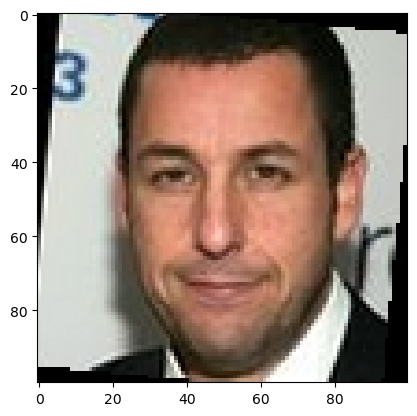

In [42]:
import cv2
import matplotlib.pyplot as plt

# BGR
img = cv2.imread('../working/oversampled/Adam Sandler/73.jpg')
# BGR ==> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [43]:
# aspect ratio = width / height
aspect_ratio = img.shape[0] / img.shape[1]
aspect_ratio

1.0

In [44]:
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np


def preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(100, 100), verbose=0):
    # load the images as a feature matrix
    image_list = []  # list of numpy arrays
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # image resizing
        # for gray or color images, the linear interpolation sounds good
        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)        
        image_list.append(img)
        
        if verbose and (index % verbose) == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # numpy array 4D: n_imgs, height, width, n_channels
    X = np.array(image_list)
    
    # feature scaling
    # numpy arary 4D with values within [0, 1]
    X = X / 255.0
    
    # encoding the classes
    # numpy array 1D with integer labels
    y = label_encoder.transform(dataset_df['class'])
    
    return X, y

In [45]:
from tensorflow.keras.utils import Sequence
import numpy as np
import math
import cv2


class MyGenerator(Sequence):
    def __init__(self, dataset_df, label_encoder, batch_size, new_dims=(100, 100)):
        self.dataset_df = dataset_df
        self.label_encoder = label_encoder
        self.batch_size = batch_size
        self.new_dims = new_dims
    
    
    def __len__(self):
        n_samples = self.dataset_df.shape[0]
        
        return math.ceil(n_samples / float(self.batch_size))
    
    
    def __getitem__(self, idx):
        batch_begin = idx * self.batch_size
        batch_end = (idx + 1) * self.batch_size
        
        batch_df = self.dataset_df[batch_begin:batch_end]
        
        X_batch, y_batch = preprocess_faces_dataset(batch_df, self.label_encoder, self.new_dims, verbose=0)
        #X_batch, y_batch = preprocess_faces_dataset(batch_df, self.label_encoder, self.new_dims)
                
        return X_batch, y_batch

In [46]:
# training a Label Encoder from the train set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(dataset_df_train['class'])

label_encoder.classes_

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [47]:
batch_size = 32

training_batch_generator = MyGenerator(dataset_df_train, label_encoder, batch_size, new_dims=(100, 100))
validation_batch_generator = MyGenerator(dataset_df_val, label_encoder, batch_size, new_dims=(100, 100))
test_batch_generator = MyGenerator(dataset_df_test, label_encoder, batch_size, new_dims=(100, 100))

In [48]:
#test_batch_generator = MyGenerator(dataset_df_test, label_encoder, batch_size, new_dims=(100, 100))

In [49]:
# transform/map the string class to the trained numeric class
#label_encoder.transform(['Alec Baldwin', 'Claudia Schiffer', 'Zac Efron'])

In [50]:
# preprocessing the train set
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder)
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(100, 100))

In [51]:
'''
print(f'X_train.shape: {X_train.shape}')
print(f'y_train (classes): {np.unique(y_train)}')
print(f'y_train.shape: {y_train.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')
'''

"\nprint(f'X_train.shape: {X_train.shape}')\nprint(f'y_train (classes): {np.unique(y_train)}')\nprint(f'y_train.shape: {y_train.shape}')\n\n# rescaled 24-bit color image\nprint(f'Min. value of X_train: {X_train.min()}')\nprint(f'Max. value of X_train: {X_train.max()}\n')\n"

In [52]:
#import matplotlib.pyplot as plt
#plt.imshow(X_train[0])

In [53]:

# preprocessing the validation set
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder)
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(100, 100))

In [54]:
'''
print(f'X_val.shape: {X_val.shape}')
print(f'y_val (classes): {np.unique(y_val)}')
print(f'y_val.shape: {y_val.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_val: {X_val.min()}')
print(f'Max. value of X_val: {X_val.max()}\n')
'''

"\nprint(f'X_val.shape: {X_val.shape}')\nprint(f'y_val (classes): {np.unique(y_val)}')\nprint(f'y_val.shape: {y_val.shape}')\n\n# rescaled 24-bit color image\nprint(f'Min. value of X_val: {X_val.min()}')\nprint(f'Max. value of X_val: {X_val.max()}\n')\n"

In [55]:
#import matplotlib.pyplot as plt
#plt.imshow(X_val[0])

In [56]:
# preprocessing the test set
#X_test, y_test = preprocess_faces_dataset(dataset_df_test, label_encoder)

In [57]:
#import matplotlib.pyplot as plt
#plt.imshow(X_test[0])

# 1.8 Saving the preprocessed data

In [58]:
'''
import os

out_dir = '../working/preprocessed'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
dataset_df_full_train.to_csv(os.path.join(out_dir, 'full_train.csv'), index=False)

dataset_df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)
np.save(os.path.join(out_dir, 'train_data_64x64x3.npy'), X_train)
np.save(os.path.join(out_dir, 'train_labels.npy'), y_train)

dataset_df_val.to_csv(os.path.join(out_dir, 'validation.csv'), index=False)
np.save(os.path.join(out_dir, 'validation_data_64x64x3.npy'), X_val)
np.save(os.path.join(out_dir, 'validation_labels.npy'), y_val)

dataset_df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)
np.save(os.path.join(out_dir, 'test_data_64x64x3.npy'), X_test)
np.save(os.path.join(out_dir, 'test_labels.npy'), y_test)
'''

"\nimport os\n\nout_dir = '../working/preprocessed'\n\nif not os.path.exists(out_dir):\n    os.makedirs(out_dir)\n    \ndataset_df_full_train.to_csv(os.path.join(out_dir, 'full_train.csv'), index=False)\n\ndataset_df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)\nnp.save(os.path.join(out_dir, 'train_data_64x64x3.npy'), X_train)\nnp.save(os.path.join(out_dir, 'train_labels.npy'), y_train)\n\ndataset_df_val.to_csv(os.path.join(out_dir, 'validation.csv'), index=False)\nnp.save(os.path.join(out_dir, 'validation_data_64x64x3.npy'), X_val)\nnp.save(os.path.join(out_dir, 'validation_labels.npy'), y_val)\n\ndataset_df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)\nnp.save(os.path.join(out_dir, 'test_data_64x64x3.npy'), X_test)\nnp.save(os.path.join(out_dir, 'test_labels.npy'), y_test)\n"

# 2 Training the model

# 2.1 Stablish base model for transfer learning VGG16

In [59]:
# https://keras.io/api/applications/vgg/
# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16
                   weights="imagenet", # we will use the weights learned for the ImageNet dataset
                   input_shape=(100, 100, 3))  # let's consider a smaller resolution than the original paper due to lack of memory


# freeze the base model weights ==> these weights won't be updated during training
# i.e., the weights of all layers from the base model are not updated
base_model.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [60]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

# 2.2 Define the connected model

In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation

model = Sequential([
    # our base model - feature extraction
    base_model,

    # data augmentation layers
#        RandomFlip("horizontal"),
#        RandomRotation(factor=0.1),
#        RandomTranslation(height_factor=0.1, width_factor=0.1),
        
        # CNN
#        Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
#        MaxPool2D(pool_size=(1,1)),
#        Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
 #       MaxPool2D(pool_size=(1,1)),
  
    
    Flatten(),
    
    # FC classifier
   Dense(256, activation='relu'),
 #  Dense(128, activation='relu'),
  #  Dense(64, activation='relu'),
    
    Dense(83, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dense_1 (Dense)             (None, 83)                21331     
                                                                 
Total params: 15,915,923
Trainable params: 1,201,235
Non-trainable params: 14,714,688
_________________________________________________________________


# 2.3 Compile and run the model

In [63]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [64]:
import tensorflow
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [65]:
#history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
history = model.fit(training_batch_generator, epochs=100, validation_data=validation_batch_generator, callbacks=[early_stopping_cb],  use_multiprocessing=True, workers=16, max_queue_size=32)
                    # Used for generator or keras.utils.Sequence input only
                   

Epoch 1/5
664/664 [==============================] - 52s 65ms/step - loss: 3.4259 - accuracy: 0.1697 - val_loss: 2.7662 - val_accuracy: 0.2980
Epoch 2/5
664/664 [==============================] - 48s 71ms/step - loss: 2.4278 - accuracy: 0.3738 - val_loss: 2.4091 - val_accuracy: 0.3675
Epoch 3/5
664/664 [==============================] - 43s 63ms/step - loss: 1.9623 - accuracy: 0.4851 - val_loss: 2.1422 - val_accuracy: 0.4422
Epoch 4/5
664/664 [==============================] - 46s 68ms/step - loss: 1.6566 - accuracy: 0.5593 - val_loss: 2.0794 - val_accuracy: 0.4477
Epoch 5/5
664/664 [==============================] - 45s 65ms/step - loss: 1.4218 - accuracy: 0.6194 - val_loss: 1.9979 - val_accuracy: 0.4693


# 2.4 Visualizing the training history

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

Text(0, 0.5, 'Score')

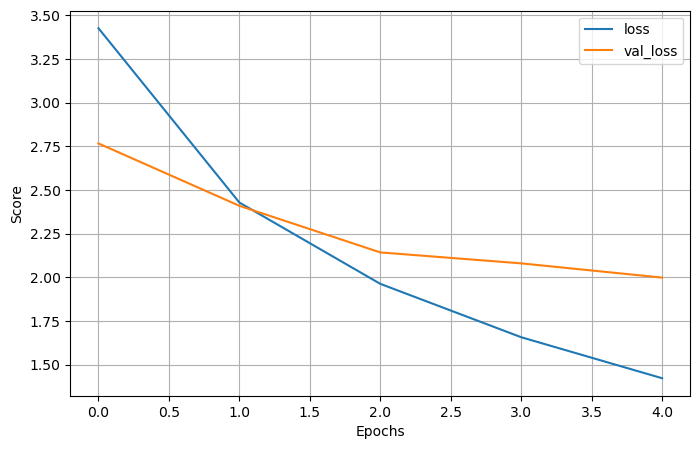

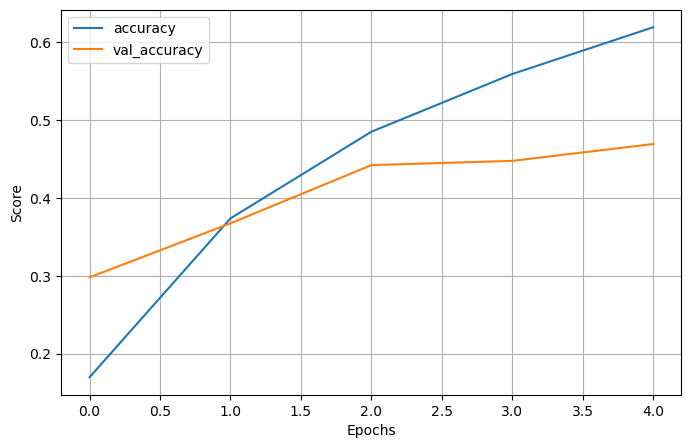

In [67]:
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

history_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

In [68]:
# checking class balancing in the training set
#test_folder = '../input/ifsp-d3apl-2023-face-recognition/test/test/'

#dataset_df_test['class'].value_counts()

# Model evaluation

In [69]:
model.evaluate(test_batch_generator)

208/208 [==============================] - 5s 23ms/step - loss: 2.0346 - accuracy: 0.4654


[2.0346386432647705, 0.46536144614219666]

In [70]:
y_test_proba = model.predict(test_batch_generator)
y_test_proba

208/208 [==============================] - 4s 18ms/step


array([[5.1179315e-05, 6.3101569e-04, 2.1759923e-05, ..., 9.7612580e-03,
        7.7753311e-06, 1.4206957e-02],
       [4.1070175e-06, 1.7907012e-02, 4.2760330e-05, ..., 8.4989332e-04,
        3.4403961e-04, 4.1818479e-04],
       [6.0360780e-06, 1.2662746e-08, 3.6574538e-06, ..., 1.1755080e-03,
        2.0047063e-04, 2.6506680e-04],
       ...,
       [3.0604003e-03, 1.5044765e-04, 1.1087734e-05, ..., 2.1495223e-03,
        5.2989024e-01, 4.5851883e-02],
       [2.6699336e-05, 1.6030966e-03, 1.9061476e-05, ..., 1.8287033e-03,
        4.3031825e-03, 1.8352418e-03],
       [8.2777569e-07, 2.5974614e-05, 1.6128396e-03, ..., 1.2195170e-04,
        1.8787033e-07, 1.6606599e-01]], dtype=float32)

In [71]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([33, 17, 69, ..., 81, 26, 52])

In [72]:
from sklearn.metrics import classification_report

y_test = label_encoder.transform(dataset_df_test['class'])
class_names = label_encoder.classes_

print(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))

                      precision    recall  f1-score   support

        Adam Sandler       0.74      0.46      0.57        80
        Alec Baldwin       0.56      0.76      0.65        80
      Angelina Jolie       0.33      0.44      0.38        80
     Anna Kournikova       0.00      0.00      0.00        80
      Ashton Kutcher       0.51      0.55      0.53        80
       Avril Lavigne       0.35      0.71      0.47        80
        Barack Obama       0.64      0.71      0.67        80
         Ben Affleck       0.65      0.19      0.29        80
     Beyonce Knowles       0.51      0.23      0.31        80
           Brad Pitt       0.20      0.30      0.24        80
        Cameron Diaz       0.58      0.19      0.28        80
      Cate Blanchett       0.30      0.20      0.24        80
     Charlize Theron       0.24      0.24      0.24        80
     Christina Ricci       0.52      0.51      0.52        80
    Claudia Schiffer       0.53      0.47      0.50        80
       

# Generating prediciton file for submission

In [73]:
#import os

# checking class balancing in the training set
test_folder = '../input/ifsp-d3apl-2023-face-recognition/test/test/'

img_test_list = sorted(os.listdir(test_folder))

img_test_full_paths = []
#img_pred_classes = []

for img_test in img_test_list:
    full_img_test_path = os.path.join(test_folder, img_test)
    img_test_full_paths.append(full_img_test_path)

# creating a dataframe to store the image full pathnames and their corresponding classes
#import pandas as pd

dataset_df_test = pd.DataFrame({
    'image_pathname': img_test_full_paths
   })

dataset_df_test
    
    # print()
#print(img_test_list)

,image_pathname
0,../input/ifsp-d3apl-2023-face-recognition/test...
1,../input/ifsp-d3apl-2023-face-recognition/test...
2,../input/ifsp-d3apl-2023-face-recognition/test...
3,../input/ifsp-d3apl-2023-face-recognition/test...
4,../input/ifsp-d3apl-2023-face-recognition/test...
...,...
1655,../input/ifsp-d3apl-2023-face-recognition/test...
1656,../input/ifsp-d3apl-2023-face-recognition/test...
1657,../input/ifsp-d3apl-2023-face-recognition/test...
1658,../input/ifsp-d3apl-2023-face-recognition/test...


In [74]:
dataset_df_test['image_pathname'].value_counts()

../input/ifsp-d3apl-2023-face-recognition/test/test/0001.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/1104.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/1114.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/1113.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/1112.jpg    1
                                                               ..
../input/ifsp-d3apl-2023-face-recognition/test/test/0551.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/0550.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/0549.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/0548.jpg    1
../input/ifsp-d3apl-2023-face-recognition/test/test/1660.jpg    1
Name: image_pathname, Length: 1660, dtype: int64

In [75]:
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np


def preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(100, 100), verbose=0):
    # load the images as a feature matrix
    image_list = []  # list of numpy arrays
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # image resizing
        # for gray or color images, the linear interpolation sounds good
        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)        
        image_list.append(img)
        
        if verbose and (index % verbose) == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # numpy array 4D: n_imgs, height, width, n_channels
    X = np.array(image_list)
    
    # feature scaling
    # numpy arary 4D with values within [0, 1]
    X = X / 255.0
    
    # encoding the classes
    # numpy array 1D with integer labels
    #y = label_encoder.transform(dataset_df['class'])
    
    return X

x_test=preprocess_faces_dataset(dataset_df_test, label_encoder, new_img_dims=(100, 100))
x_test


array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [76]:
y_test_proba = model.predict(x_test)
y_test_proba

52/52 [==============================] - 2s 28ms/step


array([[8.13614861e-06, 5.56103478e-05, 4.35170764e-03, ...,
        2.30379374e-04, 7.37385797e-09, 5.20582427e-04],
       [3.68001783e-04, 1.12834815e-02, 3.54693420e-02, ...,
        2.69063916e-02, 1.16520932e-04, 1.97107415e-03],
       [8.16471365e-05, 4.95697989e-08, 1.21386802e-05, ...,
        8.90345722e-02, 1.34387804e-07, 2.10620115e-07],
       ...,
       [9.08903264e-09, 3.80869295e-07, 2.69347220e-03, ...,
        4.01965224e-07, 1.40495793e-08, 5.14257454e-06],
       [1.83840321e-08, 3.46084383e-10, 3.30840540e-03, ...,
        2.33525910e-08, 1.89689972e-10, 5.39141265e-09],
       [3.98993085e-04, 4.62197244e-01, 1.58235591e-04, ...,
        2.08996497e-02, 2.35776213e-04, 1.15922587e-02]], dtype=float32)

In [77]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred


array([27,  9, 76, ..., 52, 31,  1])

In [78]:
len(y_test_pred)

1660

In [79]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
class_names = label_encoder.classes_

#y_test_pred = label_encoder.transform(dataset_df_test['class'])

le_fitted = le.fit_transform(class_names)

inverted = le.inverse_transform(y_test_pred)

print(inverted)
len(inverted)

['Eva Mendes' 'Brad Pitt' 'Steve Carell' ... 'Lindsay Lohan'
 'Gwyneth Paltrow' 'Alec Baldwin']


1660

In [80]:
image_id=list(range(1661))
image_id.pop(0)
len(image_id)



1660

In [1]:
dataset_submission = pd.DataFrame({
    'image-id': image_id,
    'prediction': inverted
   })

dataset_submission

NameError: name 'pd' is not defined

In [82]:
dataset_submission.to_csv('../working/prediction_400.csv', index=False)